In [8]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [49]:
qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
#Flipping first two qubits

qc_ha.cx(0,2)
qc_ha.cx(1,2)
#Sum

qc_ha.ccx(0,1,3)
qc_ha.barrier()
#Carry

qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

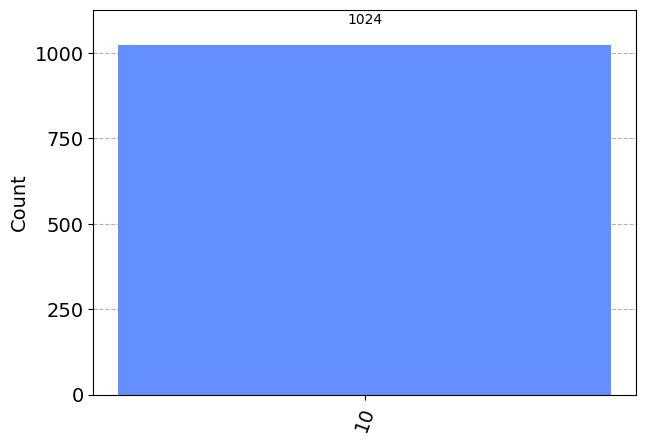

In [50]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

In [70]:
qc_fa = QuantumCircuit(8,2)

#Inputs
qc_fa.x(0)
qc_fa.x(1)
qc_fa.x(2)
qc_fa.barrier()

#Sum
qc_fa.cx(0,6)
qc_fa.cx(1,6)
qc_fa.cx(2,6)

#AB
qc_fa.ccx(0,1,3)

#BC
qc_fa.ccx(1,2,4)

#CA
qc_fa.ccx(2,0,5)

#Carry
qc_fa.cx(3,7)
qc_fa.cx(4,7)
qc_fa.cx(5,7)
qc_fa.barrier()

#Measure
qc_fa.measure(6,0)
qc_fa.measure(7,1)
qc_fa.draw()

┌───┐ ░                                               ░       
q_0: ┤ X ├─░───■──────────────■──────────────■─────────────░───────
     ├───┤ ░   │              │              │             ░       
q_1: ┤ X ├─░───┼────■─────────■────■─────────┼─────────────░───────
     ├───┤ ░   │    │         │    │         │             ░       
q_2: ┤ X ├─░───┼────┼────■────┼────■─────────■─────────────░───────
     └───┘ ░   │    │    │  ┌─┴─┐  │         │             ░       
q_3: ──────░───┼────┼────┼──┤ X ├──┼────■────┼─────────────░───────
           ░   │    │    │  └───┘┌─┴─┐  │    │             ░       
q_4: ──────░───┼────┼────┼───────┤ X ├──┼────┼────■────────░───────
           ░   │    │    │       └───┘  │  ┌─┴─┐  │        ░       
q_5: ──────░───┼────┼────┼──────────────┼──┤ X ├──┼────■───░───────
           ░ ┌─┴─┐┌─┴─┐┌─┴─┐            │  └───┘  │    │   ░ ┌─┐   
q_6: ──────░─┤ X ├┤ X ├┤ X ├────────────┼─────────┼────┼───░─┤M├───
           ░ └───┘└───┘└───┘          ┌─┴─┐     ┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐
q_7: ──────░──────────────────────────┤ X ├─────┤ X ├┤ X ├─░──╫─┤M├
           ░                          └───┘     └───┘└───┘ ░  ║ └╥┘
c: 2/═════════════════════════════════════════════════════════╩══╩═
                                                              0  1

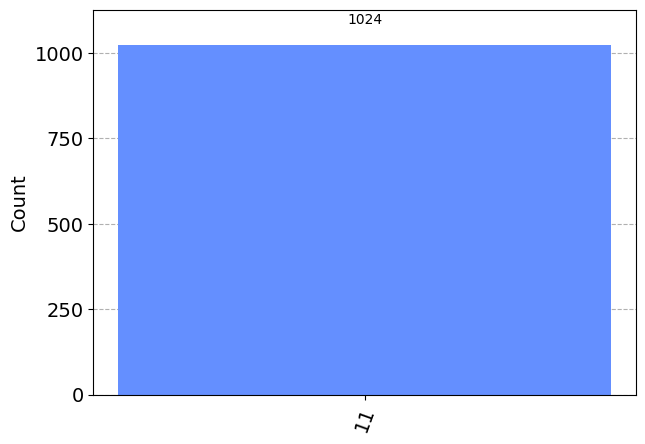

In [71]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_fa).result()
counts = result.get_counts()
plot_histogram(counts)